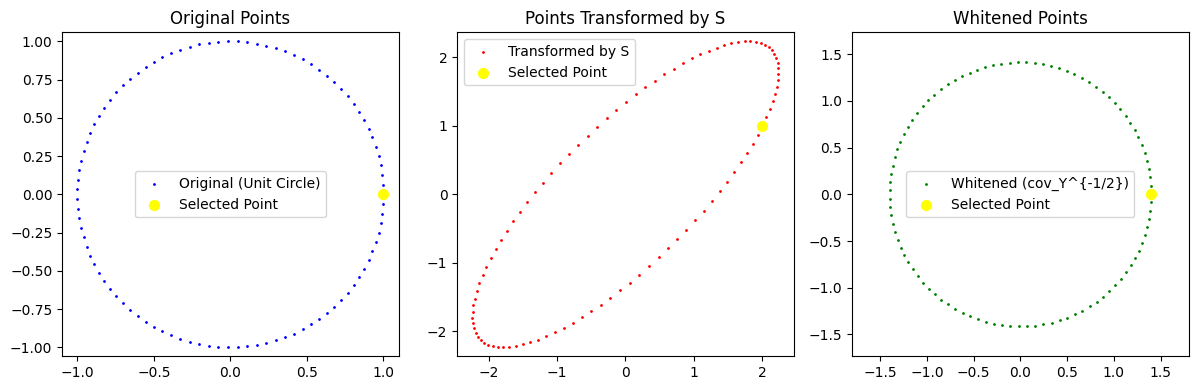

Selected Point X: [1. 0.]
Transformed Point Y: [2. 1.]
Whitened Point Z: [1.40027579 0.00346611]
Euclidean Distance of Original Point X: 1.000
Mahalanobis Distance of Transformed Point Y: 1.400
Euclidean Distance of Whitened Point Z: 1.400


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate points on a unit circle (only need one point for comparison)
theta = np.linspace(0, 2 * np.pi, 100)
X = np.array([np.cos(theta), np.sin(theta)]).T  # n x 2 matrix
point_idx = 0  # Select the first point for comparison
X_point = X[point_idx:point_idx+1]  # Extract one point as 1 x 2 matrix

# Define covariance matrix
S = np.array([[2, 1], [1, 2]])

# Transform the single point
Y_point = X_point @ S  # Transform by covariance matrix
Y = X @ S  # Transform all points
# Calculate covariance of Y (using all points for accuracy, then apply to single point)
cov_Y = np.cov(Y.T)  # Compute covariance matrix of all transformed points

# Eigenvalue decomposition of cov_Y
eigenvalues, Q = np.linalg.eigh(cov_Y)
Lambda = np.diag(eigenvalues)
Lambda_inv_sqrt = np.diag(1 / np.sqrt(eigenvalues + 1e-10))  # Add small epsilon to avoid division by zero
S_inv_sqrt_Y = Q @ Lambda_inv_sqrt @ Q.T

Z = Y @ S_inv_sqrt_Y  # Apply whitening transformation to all points
# Whitening transformation applied to the single point
Z_point = Y_point @ S_inv_sqrt_Y  # Whiten the single point

# Compute distances for the single point
euclidean_dist_X = np.sqrt(np.sum(X_point**2))  # Euclidean distance of original point
mahalanobis_dist_Y = np.sqrt((Y_point @ np.linalg.inv(cov_Y) @ Y_point.T)[0, 0])  # Mahalanobis distance of Y
transformed_euclidean_dist_Z = np.sqrt(np.sum(Z_point**2))  # Euclidean distance of whitened point

# Plotting (optional, showing the single point context)
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c='blue', label='Original (Unit Circle)', s=1)
plt.scatter(X_point[0, 0], X_point[0, 1], c='yellow', label='Selected Point', s=50)
plt.axis('equal')
plt.title('Original Points')
plt.legend()

plt.subplot(132)
plt.scatter(Y[:, 0], Y[:, 1], c='red', label='Transformed by S', s=1)
plt.scatter(Y_point[0, 0], Y_point[0, 1], c='yellow', label='Selected Point', s=50)
plt.axis('equal')
plt.title('Points Transformed by S')
plt.legend()

plt.subplot(133)
plt.scatter(Z[:, 0], Z[:, 1], c='green', label='Whitened (cov_Y^{-1/2})', s=1)
Z_all = Y @ S_inv_sqrt_Y  # Whitened all points for visualization
plt.scatter(Z_point[0, 0], Z_point[0, 1], c='yellow', label='Selected Point', s=50)
plt.axis('equal')
plt.title('Whitened Points')
plt.legend()

plt.tight_layout()
plt.show()

# Print comparison for the single point including whitened coordinates
print(f"Selected Point X: {X_point[0]}")
print(f"Transformed Point Y: {Y_point[0]}")
print(f"Whitened Point Z: {Z_point[0]}")
print(f"Euclidean Distance of Original Point X: {euclidean_dist_X:.3f}")
print(f"Mahalanobis Distance of Transformed Point Y: {mahalanobis_dist_Y:.3f}")
print(f"Euclidean Distance of Whitened Point Z: {transformed_euclidean_dist_Z:.3f}")